In [3]:
import numpy as np

In [146]:
X = np.array([[1,2,3],
             [2,5,6],
             [3,8,9],
             [4,1,1],
             [5,2,1],
             [6,2,4],
             [7,2,3],
             [8,6,3],
             [9,2,3]])
y = np.array([1,3,4,5,6,7,8,9,2])

beta = np.zeros(X.shape[1])
betas_array= []
betas_a= []
historico = []
historico.append(beta.copy())
for _ in range(3):
    for i in range(len(X.T)):
        X_n = X.T[i]
        X_n = np.reshape(X_n, (len(X_n), 1))
        betas_xi = np.delete(beta, i, axis=0)
        X_m = np.delete(X.T, i, axis=0)
        betas_new = ((y - X_m.T@betas_xi).T@X_n / np.dot(X_n.T, X_n))
        beta[i] = betas_new
    #tengo que poner que beta a final de la iteracción es igual a algo y al inicio volver a poner que beta es igual a ese algo anterior
    historico.append(beta.copy())
historico = np.array(historico)
print(historico)


  


[[ 0.          0.          0.        ]
 [ 0.90175439  0.17774573 -0.03533339]
 [ 0.83141794  0.28221457 -0.06589712]
 [ 0.79513126  0.34869885 -0.09263406]]


[0.         0.90175439 0.83141794 0.79513126]


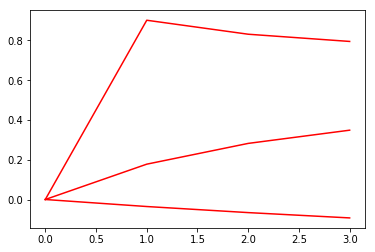

In [147]:
print(historico[:, 0])
plt.plot(range(4), historico[:,0], 'r')
plt.plot(range(4), historico[:,1], 'r')
plt.plot(range(4), historico[:,2], 'r')

plt.show()

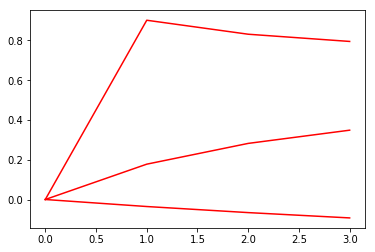

In [148]:
for i in range(historico.shape[1]):
    plt.plot(range(4), historico[:,i], 'r')

# EJERCICIO QUE FUNCIONA: COORDINATE DESCENT

In [151]:
beta = np.zeros(X.shape[1])
#beta = np.reshape(beta, (len(beta),1))
betas_array= []
betas_a= []
historico = []
historico.append(beta.copy())
for _ in range(3):
    for i in range(len(X.T)):
        X_n = X.T[i]
        X_n = np.reshape(X_n, (len(X_n), 1))
        betas_xi = np.delete(beta, i, axis=0)
        X_m = np.delete(X.T, i, axis=0)
        betas_new = ((y - X_m.T@betas_xi).T@X_n / np.dot(X_n.T, X_n))
        beta[i] = betas_new
    #tengo que poner que beta a final de la iteracción es igual a algo y al inicio volver a poner que beta es igual a ese algo anterior
    historico.append(beta.copy())
historico = np.array(historico)
print(historico)

[[ 0.          0.          0.        ]
 [ 0.90175439  0.17774573 -0.03533339]
 [ 0.83141794  0.28221457 -0.06589712]
 [ 0.79513126  0.34869885 -0.09263406]]


In [ ]:
beta = np.zeros(X.shape[1])
beta = np.reshape(beta, (len(beta),1))
betas_array= []
betas_a= []
historico = []
historico.append(beta.copy())
for _ in range(100):
    for i in range(len(X.T)):
        X_n = X.T[i]
        X_n = np.reshape(X_n, (len(X_n), 1))
        betas_xi = np.delete(beta, i, axis=0)
        X_m = np.delete(X.T, i, axis=0)
        betas_new = ((y - X_m.T@betas_xi).T@X_n / np.dot(X_n.T, X_n))
        beta[i] = betas_new
    #tengo que poner que beta a final de la iteracción es igual a algo y al inicio volver a poner que beta es igual a ese algo anterior
    historico.append(beta.copy())
historico = np.array(historico)
print(historico)

In [ ]:
fig= plt.figure(figsize=(15,10))
plt.plot(range(101), historico[:,0], 'r', color="red", label='Beta 0')
plt.plot(range(101), historico[:,1], 'r', color="blue", label='Beta 1')
plt.plot(range(101), historico[:,2], 'r', color="gray", label='Beta 2')
plt.plot(range(101), historico[:,3], 'r', color="yellow", label='Beta 3')
plt.plot(range(101), historico[:,4], 'r', color="green", label='Beta 4')
plt.plot(range(101), historico[:,5], 'r', color="black", label='Beta 5')
plt.plot(range(101), historico[:,6], 'r', color="brown", label='Beta 6')
plt.plot(range(101), historico[:,7], 'r', color="pink", label='Beta 7')
plt.plot(range(101), historico[:,8], 'r', color="purple", label='Beta 8')
plt.plot(range(101), historico[:,9], 'r', color="#8EBA42", label='Beta 9')
plt.plot(range(101), historico[:,10], 'r', color="#E24A33", label='Beta 10')
plt.plot(range(101), historico[:,11], 'r', color="#bfbbd9", label='Beta 11')
plt.legend(bbox_to_anchor=(1.25, 1),loc = 'upper right', borderaxespad=0)
plt.show()

In [4]:
X = np.array([[1,1,1],
             [1,1,-1],
             [1,-1,0],
             [1,-1,-1]])
y = np.array([[1.4],
              [1.6],
              [0.5],
              [0.6]])
X

array([[ 1,  1,  1],
       [ 1,  1, -1],
       [ 1, -1,  0],
       [ 1, -1, -1]])

In [195]:
def coordinate_descent(X, y, beta, lambdas):
    for _ in range(2):
        for i in range(len(X.T)):
            X_n = X.T[i]
            X_n = np.reshape(X_n, (len(X_n), 1))
            betas_xi = np.delete(beta, i, axis=0)
            X_m = np.delete(X.T, i, axis=0)
            betas = ((y - X_m.T@betas_xi).T@X_n / np.dot(X_n.T, X_n))
            print(betas)
            error = (1*(1/2) / np.dot(X_n.T, X_n))
            if betas > error:
                betas_new = betas - error #no utilziar todas las betas sino solamente el par
            elif abs(betas) <= error:
                betas_new = 0
            elif betas < -e:
                betas_new =  betas + error
            beta[i] = betas_new
        historico.append(beta.copy())
    historico = np.array(historico)

In [196]:
beta = np.zeros(X.shape[1])
beta = np.reshape(beta, (len(beta),1))
betas_array= []
betas_a= []
historico = []
historico.append(beta.copy())

a, b = coordinate_descent(X, y, beta, 1, 0)
print(a)

[[5.6]
 [6.4]
 [2. ]
 [2.4]]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [339]:
def function(X, y, beta):
    function = (np.dot((y - X@beta).T,(y - X@beta)) + (1*(1/2))) / np.dot(X_n.T, X_n)
    return function

beta = np.zeros(X.shape[1])
beta = np.reshape(beta, (len(beta),1))
betas_array= []
betas_a= []
historico = []
historico.append(beta.copy())
for _ in range(3):
    for i in range(len(X.T)):
        X_n = X.T[i]
        X_n = np.reshape(X_n, (len(X_n), 1))
        betas_xi = np.delete(beta, i, axis=0)
        X_m = np.delete(X.T, i, axis=0)
        betas = ((y - X_m.T@betas_xi).T@X_n / np.dot(X_n.T, X_n))
        error = (1*(1/2) / np.dot(X_n.T, X_n))
        if betas > error:
            betas_new = betas - error #no utilziar todas las betas sino solamente el par
        elif abs(betas) <= error:
            betas_new = 0
        elif betas < -e:
            betas_new =  betas + error
        beta[i] = betas_new
    beta_end = beta
    historico.append(beta.copy())





[[0.9]
 [0. ]
 [0. ]]
[[0.9 ]
 [0.35]
 [0.  ]]
[[0.9 ]
 [0.35]
 [0.  ]]
[[0.9 ]
 [0.35]
 [0.  ]]
[[0.9 ]
 [0.35]
 [0.  ]]
[[0.9 ]
 [0.35]
 [0.  ]]
[[0.9 ]
 [0.35]
 [0.  ]]
[[0.9 ]
 [0.35]
 [0.  ]]
[[0.9 ]
 [0.35]
 [0.  ]]


In [ ]:
def function(X, y, beta):
    function = (np.dot((y - X@beta).T,(y - X@beta)) + (1*(1/2))) / np.dot(X_n.T, X_n)
    return function

beta = np.zeros(X.shape[1])
beta = np.reshape(beta, (len(beta),1))
betas_array= []
betas_a= []
historico = []
historico.append(beta.copy())
for _ in range(100):
    for i in range(len(X.T)):
        X_n = X.T[i]
        X_n = np.reshape(X_n, (len(X_n), 1))
        betas_xi = np.delete(beta, i, axis=0)
        X_m = np.delete(X.T, i, axis=0)
        betas = ((y - X_m.T@betas_xi).T@X_n / np.dot(X_n.T, X_n))
        error = (1*(1/2) / np.dot(X_n.T, X_n))
        if betas > error:
            betas_new = betas - error #no utilziar todas las betas sino solamente el par
        elif abs(betas) <= error:
            betas_new = 0
        elif betas < -e:
            betas_new =  betas + error
        beta[i] = betas_new
    beta_end = beta
    historico.append(beta.copy())
    if function(X, y, historico[-2]) - function(X, y, historico[-1]) < 0.0001:
        print(function(X, y, beta_old), function(X, y, beta_end))
    else:
        print('Not converged in max number of iterations')
        break





In [347]:
def coordinate_descent(X, y, beta, parameter): 
    for _ in range(2):
        for i in range(len(X.T)):
            X_n = X.T[i]
            X_n = np.reshape(X_n, (len(X_n), 1))
            betas_xi = np.delete(beta, i, axis=0)
            X_m = np.delete(X.T, i, axis=0)
            betas = ((y - X_m.T@betas_xi).T@X_n / np.dot(X_n.T, X_n))
            error = (parameter*(1/2) / np.dot(X_n.T, X_n))
            if betas > error:
                betas_new = betas - error #no utilziar todas las betas sino solamente el par
            elif abs(betas) <= error:
                betas_new = 0
            elif betas < -e:
                betas_new =  betas + error
            beta[i] = betas_new
        historico.append(beta.copy())
    return beta, historico

In [348]:
a,b = coordinate_descent(X, y, beta, 1)
print(a)

[[0.9 ]
 [0.35]
 [0.  ]]


PRUEBAS PARA RIDGE EJERCICIO 1


In [1]:
u = [0.01, 0.001, 0.001]
parameter = [0.001, 1, 0.1]

answers_array = []
for i in range(len(u)):
    clf = Ridge(alpha=parameter[i], warm_start=True)
    for i in range(100):
        clf.fit(X, y)
        answers_array.append(clf.fit(X, y))
    print(answers_array)

def Ridge(X, y, X_test, y_test):
    total=0
    sets =  linear_model.Ridge(alpha=1.0)
    for i in range(100):
        sets1 = sets.partial_fit(X, Y)
        y_hat =  sets1.predict(X_test)
        total += RMSE_function(Y_test, y_hat)  
        return total

print(Ridge(X, Y, X_test, Y_test))

NameError: name 'Ridge' is not defined

In [18]:
def RMSE_function(y, y_hat):
    error = np.sqrt(np.sum((y - y_hat)**2)/y.shape[0])
    return error

def SGD_regression(X, y, X_test, y_test, u, parameter):
    total_train = 0
    total_test = 0
    train_RMSE = []
    test_RMSE = []
    sets = linear_model.SGDRegressor(alpha = parameter, eta0 = u,  warm_start=True, penalty=None)
    for i in range(100):
        sets_it = sets.partial_fit(X, Y)
        betas = sets_it.coef_
        y_hat = sets_it.predict(X)
        y_hat_test = sets_it.predict(X_test)
        #total_train = RMSE_function(Y, y_hat)
        total_train = mean_squared_error(Y, y_hat, squared=False)
        #total_test = RMSE_function(Y_test, y_hat_test)
        total_test = mean_squared_error(Y_test, y_hat_test, squared=False)
        scores = str(sets_it.score)
        train_RMSE.append(total_train)
        test_RMSE.append(total_test)
    print("[INFO] MSE : {}".format(round(mean_squared_error(Y, y_hat), 2)))

    return betas, total_train, total_test, train_RMSE, test_RMSE, scores, y_hat



In [19]:

a, b, c, d, e, f, g = SGD_regression(X, Y, X_test, Y_test, 0.01, 0.001)
x_axis = np.array(range(0, g.shape[0]))
plt.plot(x_axis, y_hat, linestyle="--", marker="o", alpha=0.7, color='r', label="predictions")
plt.plot(x_axis, Y_test, linestyle="--", marker="o", alpha=0.7, color='g', label="Y_test")
plt.xlabel('Row number')
plt.ylabel('PRICE')
plt.title('Predictions vs Y_test')
plt.legend(loc='lower right')
plt.savefig("predictions_vs_ytest.png")
plt.clf()
plt.close()

NameError: name 'Y' is not defined